# 07_05: Challenge

find top ten unisex names

Unisex = 0.5 < (total number of boys) / (total number of girls) < 2

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [67]:
pd.options.display.max_rows = 10

In [68]:
allyears = pd.read_csv('allyears.csv.gz')

In [69]:
# total number across all years, grouped by sex and name
totals = allyears.groupby(['sex','name']).number.sum()

In [70]:
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [71]:
female = totals.loc[('F')]

In [72]:
male = totals.loc[('M')]

In [32]:
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [ ]:
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [35]:
totals.loc['M'] / totals.loc['F']

name
Aaban     NaN
Aabha     NaN
Aabid     NaN
Aabidah   NaN
Aabir     NaN
           ..
Zyvion    NaN
Zyvon     NaN
Zyyanna   NaN
Zyyon     NaN
Zzyzx     NaN
Name: number, Length: 98400, dtype: float64

In [36]:
ratio = (totals.loc['M'] / totals.loc['F']).dropna()

In [37]:
ratio

name
Aaden      965.600000
Aadi        53.187500
Aadyn       32.250000
Aalijah      1.422819
Aaliyah      0.001098
              ...    
Zyion        5.464286
Zyon         4.254839
Zyonn        8.000000
Zyree        5.875000
Zyrie        0.842105
Name: number, Length: 10773, dtype: float64

In [81]:
# ratio_greaterThan_half = ratio[ratio > 0.5]
# ratio_greaterThan_half

# ratio_greaterThan_half.sort_values(ascending=False)

# ratio_lessThan_two = ratio[ratio < 2]
# ratio_lessThan_two.sort_values(ascending=False)
# ratio_lessThan_two

ratio[(ratio > 0.5) & (ratio < 2)]


name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In [83]:
unisexNames = ratio[(ratio > 0.5) & (ratio < 2)].index

In [97]:
unisexNames

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [87]:
# male.loc[unisexNames].sort_values(ascending=False)
male.loc[unisexNames]

name
Aalijah    212
Aamari     123
Aari        10
Aarin      589
Aaris       47
          ... 
Ziyan      179
Zoel        54
Zohar       77
Zyian       35
Zyrie       16
Name: number, Length: 1660, dtype: int64

In [90]:
female.loc[unisexNames].sort_values(ascending=False)
# female.loc[unisexNames]

name
Jessie      167462
Riley       106901
Jackie       90705
Casey        76312
Peyton       72180
             ...  
Salud            5
Schell           5
Selester         5
Semajae          5
Rocki            5
Name: number, Length: 1660, dtype: int64

In [92]:
commonNames = (female.loc[unisexNames] + male.loc[unisexNames]).sort_values(ascending=False)

In [93]:
commonNames

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
            ...  
Khymani        10
Raydean        10
Camlin         10
Chamel         10
Cappy          10
Name: number, Length: 1660, dtype: int64

In [94]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

ValueError: num must be an integer with 1 <= num <= 10, not 11

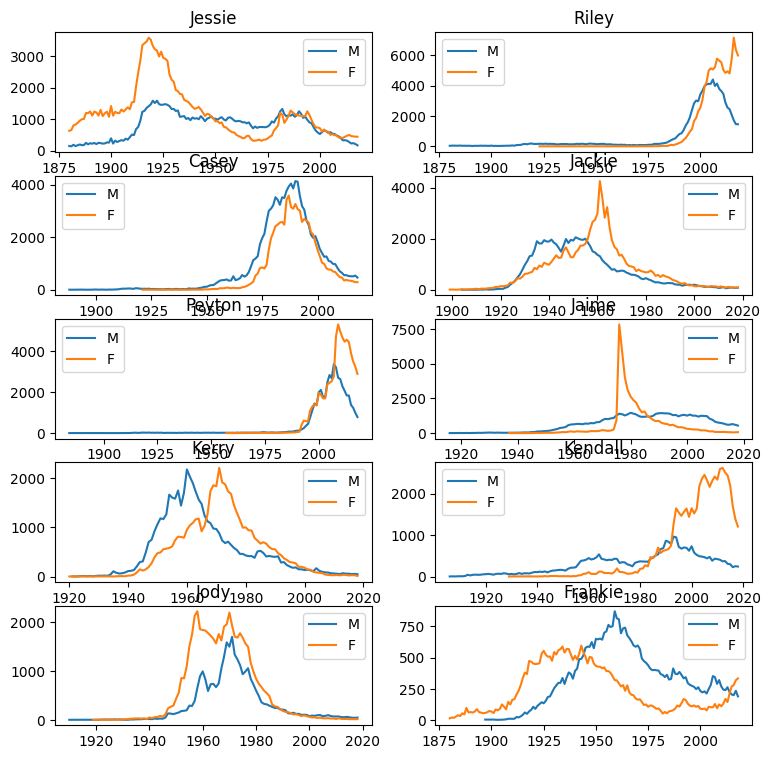

In [96]:
pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(commonNames.index):
    pp.subplot(5,2,i+1)

    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()

In [ ]:
# do not use this cell
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
# allyears_indexed.loc['Aadi']
# df = pd.DataFrame(data)
# filtered_df = df.loc[(df['col1'] > 3) | (df['col2'] < 7)]
df = pd.DataFrame(allyears_indexed)


In [5]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [5]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
    2018    James   13525
    2018   Oliver   13389
...           ...     ...
    2018   Gaylon       5
    2018   Gavynn       5
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [6]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [7]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                   
F   2018       Emma   18688
    2018     Olivia   17921
    2018        Ava   14924
    2018   Isabella   14464
    2018     Sophia   13928
    2018  Charlotte   12940
    2018        Mia   12642
    2018     Amelia   12301
    2018     Harper   10582
    2018     Evelyn   10376

In [8]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [9]:
# get the top ten names for sex and year

def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [10]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [11]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [12]:
# similar to plotname in 07_03_popularity, but using a query on unindexed data
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2018)